To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/install.html) and execute: `ploomber examples -n guides/refactor`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fguides/refactor%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=guides/refactor%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)



In [2]:
import os
from pathlib import Path
import shutil

from IPython.display import Image

# Notebook refactoring

<!-- start description -->
Using Soorgeon to convert a notebook into a Ploomber pipeline.
<!-- end description -->

[Soorgeon](https://github.com/ploomber/soorgeon) is a tool from the Ploomber ecosystem that allows you to convert monolithic notebooks into maintainable pipelines.

We have to examples, an exploratory data analysis notebook (`eda.ipynb`), and a Machine Learning notebook (`ml.ipynb`).

## Refactoring `eda.ipynb`

Before we proceed, open `eda.ipynb` to see how the code looks like, you'll notice that we have three sections (load, clean, and plot). Soorgeon uses H2 markdown headings to determine where to split the tasks in the output pipeline.

Let's execute the refactoring command:

In [2]:
%%sh
soorgeon refactor eda.ipynb

Added 'output' directory to .gitignore...
README.md found, appended auto-generated content
Finished refactoring 'eda.ipynb', use Ploomber to continue.

Install dependencies (this will install ploomber):
    $ pip install -r requirements.txt

List tasks:
    $ ploomber status

Execute pipeline:
    $ ploomber build

Plot pipeline:
    $ ploomber plot

* Documentation: https://docs.ploomber.io
* Jupyter integration: https://ploomber.io/s/jupyter
* Other editors: https://ploomber.io/s/editors



Let's generate the pipeline diagram (note: if you're running this locally, you must install `pygraphviz` first):

In [3]:
%%sh
ploomber plot

Loading pipeline...
Plot saved at: pipeline.png


100%|██████████| 3/3 [00:00<00:00, 19784.45it/s]


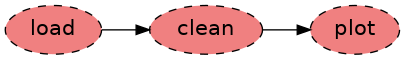

In [4]:
Image('pipeline.png')

We can see that `soorgeon refactor` generated a Ploomber pipeline with one task per notebook section. The source code for each task is in the `tasks/` folder:

In [3]:
print('\n'.join(os.listdir('tasks')))

train-test-split.ipynb
random-forest-regressor.ipynb
linear-regression.ipynb
load.ipynb
clean.ipynb


Each task is a `.py` file, however, as with any other Ploomber pipeline, you can open those scripts as notebooks by doing `Right click -> Open With -> Notebook`.

The command also generates a `pipeline.yaml` file, which is the file Ploomber uses to read your pipeline:

In [5]:
print(Path('pipeline.yaml').read_text())

tasks:

- source: tasks/load.ipynb
  product:
    df: output/load-df.pkl
    nb: output/load.html

- source: tasks/clean.ipynb
  product:
    df: output/clean-df.pkl
    nb: output/clean.html

- source: tasks/train-test-split.ipynb
  product:
    X_train: output/train-test-split-X_train.pkl
    y_test: output/train-test-split-y_test.pkl
    X_test: output/train-test-split-X_test.pkl
    y_train: output/train-test-split-y_train.pkl
    nb: output/train-test-split.html

- source: tasks/linear-regression.ipynb
  product:
    nb: output/linear-regression.html

- source: tasks/random-forest-regressor.ipynb
  product:
    nb: output/random-forest-regressor.html



Let's run the pipeline:

In [7]:
%%sh
ploomber build

Loading pipeline...
name    Ran?      Elapsed (s)    Percentage
------  ------  -------------  ------------
load    True          2.6192        32.4285
clean   True          1.75679       21.7509
plot    True          3.70087       45.8206


Building task 'plot': 100%|██████████| 3/3 [00:08<00:00,  2.69s/it]


Let's now refactor a more complex notebook.

In [8]:
# clean up the files from this pipeline
if Path('tasks').exists():
    shutil.rmtree('tasks')

if Path('output').exists():
    shutil.rmtree('output')
    
if Path('pipeline.yaml').exists():
    Path('pipeline.yaml').unlink()

## Refactoring `ml.ipynb`

`ml.ipynb` is a Machine Learning pipeline that prepares a training set and then trains two models, let's refactor it:

In [9]:
%%sh
soorgeon refactor ml.ipynb

Added 'output' directory to .gitignore...
README.md found, appended auto-generated content
Finished refactoring 'ml.ipynb', use Ploomber to continue.

Install dependencies (this will install ploomber):
    $ pip install -r requirements.txt

List tasks:
    $ ploomber status

Execute pipeline:
    $ ploomber build

Plot pipeline:
    $ ploomber plot

* Documentation: https://docs.ploomber.io
* Jupyter integration: https://ploomber.io/s/jupyter
* Other editors: https://ploomber.io/s/editors



Let's see the diagram:

In [10]:
%%sh
ploomber plot

Loading pipeline...
Plot saved at: pipeline.png


100%|██████████| 5/5 [00:00<00:00, 10280.16it/s]


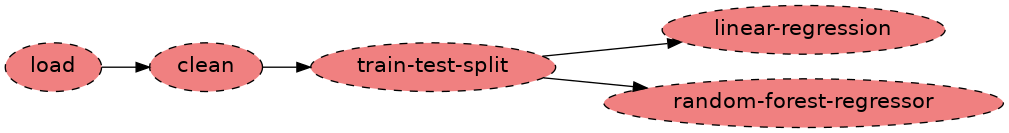

In [11]:
Image('pipeline.png')

We see that `soorgeon refactor` accurately determined the dependencies among sections, even identifying that the model training tasks (`linear-regression` and `random-forest-regressor`) are independent of each other and can run in parallel.

Let's run the pipeline:

In [12]:
%%sh
ploomber build

Loading pipeline...
name                     Ran?      Elapsed (s)    Percentage
-----------------------  ------  -------------  ------------
load                     True          3.90638      18.2755
clean                    True          5.60531      26.2238
train-test-split         True          1.86871       8.74253
linear-regression        True          3.33052      15.5815
random-forest-regressor  True          6.66398      31.1767


Building task 'random-forest-regressor': 100%|██████████| 5/5 [00:21<00:00,  4.28s/it]


That's it! Now give it a try with one of your notebooks!